In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Dicionário com Regiões e seus Estados
RegionStates = {#North
                'AM': 'North',
                'RR': 'North',
                'AP': 'North',
                'PA': 'North',
                'TO': 'North',
                'RO': 'North',
                'AC': 'North',
                #Northeast
                'MA': 'Northeast',
                'PI': 'Northeast',
                'CE': 'Northeast',
                'RN': 'Northeast',
                'PE': 'Northeast',
                'PB': 'Northeast',
                'SE': 'Northeast',
                'AL': 'Northeast',
                'BA': 'Northeast',
                #Midwest
                'MT': 'Midwest',
                'MS': 'Midwest',
                'GO': 'Midwest',
                'DF': 'Midwest',
                #Southest
                'SP': 'Southest',
                'RJ': 'Southest',
                'ES': 'Southest',
                'MG': 'Southest',
                #South
                'PR': 'South',
                'RS': 'South',
                'SC': 'South'
                }


States = {#North
          'AM': 'Amazonas',
          'RR': 'Roraima',
          'AP': 'Amapá',
          'PA': 'Para',
          'TO': 'Tocantins',
          'RO': 'Rondônia',
          'AC': 'Acre',
          #Northeast
          'MA': 'Maranhão',
          'PI': 'Piauí',
          'CE': 'Ceará',
          'RN': 'Rio Grande do North',
          'PE': 'Pernambuco',
          'PB': 'Paraíba',
          'SE': 'Sergipe',
          'AL': 'Alagoas',
          'BA': 'Bahia',
          #Midwest
          'MT': 'Mato Grosso',
          'MS': 'Mato Grosso do South',
          'GO': 'Goiás',
          'DF': 'Distrito Federal',
          #Southest
          'SP': 'São Paulo',
          'RJ': 'Rio de Janeiro',
          'ES': 'Espírito Santo',
          'MG': 'Minas Gerais',
          #South
          'PR': 'Paraná',
          'RS': 'Rio Grande do South',
          'SC': 'Santa Catarina'
          }      

regions_list = ['NORTH', 
                'SOUTH' ,
                'MIDWEST',
                'SOUTHEAST',
                'NORTHEAST']                    

In [3]:
path_2019 = "C:\Dev\GitHub\streamlit_covid\data\obitos-2019.csv"
path_2020 = "C:\Dev\GitHub\streamlit_covid\data\obitos-2020.csv"
path_2021 = "C:\Dev\GitHub\streamlit_covid\data\obitos-2021.csv"


data_2019 = pd.read_csv(path_2019)
data_2020 = pd.read_csv(path_2020)
data_2021 = pd.read_csv(path_2021)

print(f'2019 {data_2019.shape}')
print(f'2019 {data_2019.shape}')
print(f'2019 {data_2019.shape}')

2019 (12575, 6)
2019 (12575, 6)
2019 (12575, 6)


In [4]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,16
2,AC,OUTRAS,HOSPITAL,< 9,F,46
3,AC,OUTRAS,HOSPITAL,< 9,M,69
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [5]:
data_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
7095,BA,SRAG,DOMICILIO,60 - 69,M,1
3015,DF,COVID,HOSPITAL,30 - 39,F,32
14312,SE,INSUFICIENCIA_RESPIRATORIA,IGNORADO,> 100,F,1
12192,CE,PNEUMONIA,OUTROS_SERVICOS_SAUDE,90 - 99,F,51
181,CE,OUTRAS,OUTRO,< 9,F,15


In [6]:
len(data_2021['uf'].unique())

27

In [7]:
data_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [8]:
data_2019['tipo_doenca'].value_counts()

OUTRAS                        3909
PNEUMONIA                     2375
INSUFICIENCIA_RESPIRATORIA    2355
SEPTICEMIA                    2103
INDETERMINADA                 1331
SRAG                           501
COVID                            1
Name: tipo_doenca, dtype: int64

In [9]:
data_2020['tipo_doenca'].value_counts()

OUTRAS                        3893
INSUFICIENCIA_RESPIRATORIA    2397
PNEUMONIA                     2265
COVID                         2176
SEPTICEMIA                    2096
INDETERMINADA                 1399
SRAG                          1107
Name: tipo_doenca, dtype: int64

In [10]:
data_2021['tipo_doenca'].value_counts()

OUTRAS                        3794
COVID                         2398
INSUFICIENCIA_RESPIRATORIA    2321
PNEUMONIA                     2171
SEPTICEMIA                    2089
INDETERMINADA                 1387
SRAG                          1111
Name: tipo_doenca, dtype: int64

In [11]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12575 non-null  object
 1   tipo_doenca   12575 non-null  object
 2   local_obito   12575 non-null  object
 3   faixa_etaria  12575 non-null  object
 4   sexo          12571 non-null  object
 5   total         12575 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 589.6+ KB


In [12]:
total_deaths_2019 = data_2019.groupby('tipo_doenca').sum()
total_deaths_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,7181
INSUFICIENCIA_RESPIRATORIA,102384
OUTRAS,674088
PNEUMONIA,229175
SEPTICEMIA,177921
SRAG,1525


In [13]:
total_deaths_2020 = data_2020.groupby('tipo_doenca').sum()
total_deaths_2020

,total
tipo_doenca,
COVID,200629
INDETERMINADA,10038
INSUFICIENCIA_RESPIRATORIA,101685
OUTRAS,711413
PNEUMONIA,185761
SEPTICEMIA,166130
SRAG,17024


In [14]:
total_deaths_2021 = data_2021.groupby('tipo_doenca').sum()
total_deaths_2021

,total
tipo_doenca,
COVID,406580
INDETERMINADA,10850
INSUFICIENCIA_RESPIRATORIA,98991
OUTRAS,747890
PNEUMONIA,181653
SEPTICEMIA,179388
SRAG,12820


In [15]:
ratio = total_deaths_2020/total_deaths_2019
ratio

,total
tipo_doenca,
COVID,200629.000000
INDETERMINADA,1.397855
INSUFICIENCIA_RESPIRATORIA,0.993173
OUTRAS,1.055371
PNEUMONIA,0.810564
SEPTICEMIA,0.933729
SRAG,11.163279


In [16]:
states_total = data_2019.groupby(['uf','tipo_doenca']).sum()
states_total.loc['SP','SRAG']

total    293
Name: (SP, SRAG), dtype: int64

In [17]:
# Creating a Region column

data_2019["region"] = data_2019['uf'].map(RegionStates)
data_2019["region"] = data_2019["region"].astype(str)
data_2020["region"] = data_2020['uf'].map(RegionStates)
data_2020["region"] = data_2020["region"].astype(str)
data_2021["region"] = data_2021['uf'].map(RegionStates)
data_2021["region"] = data_2021["region"].astype(str)

In [18]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total,region
0,AC,OUTRAS,DOMICILIO,< 9,F,8,North
1,AC,OUTRAS,DOMICILIO,< 9,M,16,North
2,AC,OUTRAS,HOSPITAL,< 9,F,46,North
3,AC,OUTRAS,HOSPITAL,< 9,M,69,North
4,AC,OUTRAS,IGNORADO,< 9,M,1,North


NORTH


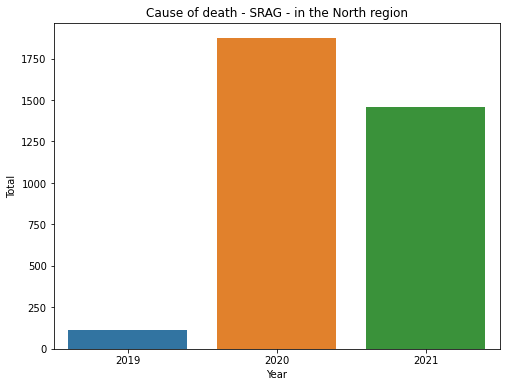

In [19]:
def plot_comparation_graph(death_cause,
                           state = 'BRASIL'):
    print(state.upper())
    if state == 'BRASIL':
        total_2019 = data_2019.groupby(['tipo_doenca']).sum()
        total_2020 = data_2020.groupby(['tipo_doenca']).sum()
        total_2021 = data_2021.groupby(['tipo_doenca']).sum()
        list_SRAG = [int(total_2019.loc[death_cause]), 
                     int(total_2020.loc[death_cause])]
        title = 'in Brazil'
    else:
   # elif state.upper() in regions_list:
        total_2019 = data_2019.groupby(['region','tipo_doenca']).sum()
        total_2020 = data_2020.groupby(['region','tipo_doenca']).sum()
        total_2021 = data_2021.groupby(['region','tipo_doenca']).sum()
        list_SRAG = [int(total_2019.loc[state, death_cause]), 
                     int(total_2020.loc[state, death_cause]),
                     int(total_2021.loc[state, death_cause])]
        title = f'in the {state} region'        



    data = pd.DataFrame({'Total': list_SRAG,
                         'Year': [2019, 2020, 2021]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = 'Year' , y = 'Total', data = data)      
    plt.title(f'Cause of death - {death_cause} - {title}')
    plt.show()                     

plot_comparation_graph('SRAG','North')    

In [49]:
disease_types = data_2021['tipo_doenca'].unique().tolist()
default_ix1 = disease_types.index('SRAG')
disease_types

states = np.append(data_2021['uf'].unique(),'BRASIL').tolist()
states

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO',
 'BRASIL']

In [20]:
def plot_comparation_graph(data_2019,
                           data_2020,
                           data_2021,
                           death_cause = 'ALL',
                           state = 'BRASIL'):

    if state == 'BRASIL':
        total_2019 = data_2019.groupby(['tipo_doenca']).sum()
        total_2020 = data_2020.groupby(['tipo_doenca']).sum()
        total_2021 = data_2021.groupby(['tipo_doenca']).sum()
        list_SRAG = [int(total_2019.loc[death_cause]), 
                     int(total_2020.loc[death_cause]),
                     int(total_2021.loc[death_cause])]
        title = 'in Brazil'
    elif state.upper() in regions_list:
        print(state.upper())
        total_2019 = data_2019.groupby(['region','tipo_doenca']).sum()
        total_2020 = data_2020.groupby(['region','tipo_doenca']).sum()
        total_2021 = data_2021.groupby(['region','tipo_doenca']).sum()
        list_SRAG = [int(total_2019.loc[state, death_cause]), 
                     int(total_2020.loc[state, death_cause]),
                     int(total_2021.loc[state, death_cause])]
        title = f'in the {state.lower()} region'        

    elif death_cause != 'ALL':                          
        total_2019 = data_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = data_2020.groupby(['uf','tipo_doenca']).sum()
        total_2021 = data_2021.groupby(['uf','tipo_doenca']).sum()
        list_SRAG = [int(total_2019.loc[state, death_cause]), 
                     int(total_2020.loc[state, death_cause]),
                     int(total_2021.loc[state, death_cause])]
        title = f'in the state of {state.upper().replace(state, States[state])}'

    data = pd.DataFrame({'Total': list_SRAG,
                         'Year': [2019, 2020, 2021]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = 'Year' , y = 'Total', data = data)      
    plt.title(f'Cause of death - {death_cause} - {title}')
    plt.show()                     

plot_comparation_graph(data_2019,data_2020,data_2021)    

KeyError: 'ALL'

In [ ]:
total_deaths_2019.loc['SRAG']

total    1525
Name: SRAG, dtype: int64

## Desafio 01: Acesar o portal e verificar como são classificados os dados.